# 6 Single Query Drill Down

In this notebook we drill down into a single query by looking at the results of different query pipelines for this particular query.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import mercury as mr
import requests
import json

In [67]:
app = mr.App(title="Query Drill Down", static_notebook=True)

mercury.App

In [4]:
df_results = pd.read_csv('results_and_ratings.csv', index_col=[0])

In [5]:
df_results.head(3)

,query_id,query_string,product_id,position,relevance,run,rating
0,0,$30 roblox gift card not digital,B00F4CF4PU,0,1.000000,min_maxarithmetic_mean0.0,NaN
1,0,$30 roblox gift card not digital,B07C438TMN,1,0.474647,min_maxarithmetic_mean0.0,NaN
2,0,$30 roblox gift card not digital,B00XJZHJCA,2,0.462698,min_maxarithmetic_mean0.0,NaN


In [8]:
df_metrics = pd.read_csv('metrics.csv')

In [9]:
df_metrics.head(5)

,query,pipeline,metric,value
0,$30 roblox gift card not digital,min_maxarithmetic_mean0.0,dcg,0.666667
1,(fiction without frontiers),min_maxarithmetic_mean0.0,dcg,7.184819
2,100,min_maxarithmetic_mean0.0,dcg,4.849485
3,10x10x6 cake box without window,min_maxarithmetic_mean0.0,dcg,1.000000
4,15 inch light weight laptop that has lots of m...,min_maxarithmetic_mean0.0,dcg,0.000000


## Deep dive into one Query in two pipelines

In notebook 5 we saw that two pipelines that have a similar configuration score differently. Both use 
* l2 as their normalization technique
* arithmetic mean as their combination technique

One has a keyword/neural ratio of 0.7/0.3, the other 0.6/0.4.

They also share some of the metrics but not all:

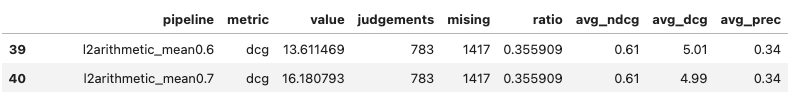

We want to identify a query that shows different results in both combinations to surface some insights.

In [18]:
pipelines_to_check = ['l2arithmetic_mean0.7', 'l2arithmetic_mean0.6']
metrics_to_check = ['dcg', 'ratio_of_ratings']
df_metrics[(df_metrics['pipeline'].isin(pipelines_to_check)) & (df_metrics['metric'].isin(metrics_to_check))].sort_values(by='query').head(25)

,query,pipeline,metric,value
34320,$30 roblox gift card not digital,l2arithmetic_mean0.6,dcg,0.666667
34980,$30 roblox gift card not digital,l2arithmetic_mean0.6,ratio_of_ratings,0.200000
35860,$30 roblox gift card not digital,l2arithmetic_mean0.7,ratio_of_ratings,0.200000
35200,$30 roblox gift card not digital,l2arithmetic_mean0.7,dcg,0.666667
35861,(fiction without frontiers),l2arithmetic_mean0.7,ratio_of_ratings,0.300000
34321,(fiction without frontiers),l2arithmetic_mean0.6,dcg,5.759984
34981,(fiction without frontiers),l2arithmetic_mean0.6,ratio_of_ratings,0.300000
35201,(fiction without frontiers),l2arithmetic_mean0.7,dcg,5.759984
34982,100,l2arithmetic_mean0.6,ratio_of_ratings,0.100000
35862,100,l2arithmetic_mean0.7,ratio_of_ratings,0.000000


### Let's have a look at 15 microsoft card

In [83]:
query = '15 microsoft card'
df_results[(df_results['run'].isin(pipelines_to_check)) & (df_results['query_string'] == query)].sort_values(by=['run', 'position'])

,query_id,query_string,product_id,position,relevance,run,rating
85850,5,15 microsoft card,B09F8SFBJ1,0,0.483787,l2arithmetic_mean0.6,3.0
85851,5,15 microsoft card,B00F4CEOS8,1,0.138504,l2arithmetic_mean0.6,3.0
85852,5,15 microsoft card,B077PD6L8G,2,0.131909,l2arithmetic_mean0.6,NaN
85853,5,15 microsoft card,B077PDHSK9,3,0.131909,l2arithmetic_mean0.6,NaN
85854,5,15 microsoft card,B077PM9C3Y,4,0.131909,l2arithmetic_mean0.6,NaN
85855,5,15 microsoft card,B00F4CEHNK,5,0.126516,l2arithmetic_mean0.6,0.0
85856,5,15 microsoft card,B00F4CEWOY,6,0.126503,l2arithmetic_mean0.6,3.0
85857,5,15 microsoft card,B07GHDHKPN,7,0.126076,l2arithmetic_mean0.6,NaN
85858,5,15 microsoft card,B00F4CF4PU,8,0.125911,l2arithmetic_mean0.6,NaN
85859,5,15 microsoft card,B00F4CF39C,9,0.125735,l2arithmetic_mean0.6,3.0


*l2, arithmetic mean, 0.6 keyword, 0.4 keyword* vs. *l2, arithmetic mean, 0.7 keyword, 0.3 keyword*_
* 50% missing judgements vs. 90% missing judgements
* The DCG value of l2arithmetic_mean0.7 is based on more uncertainty for the missing judgements
* The top hit (`B09F8SFBJ1`) is the same for both pipelines and the scores drop significantly (-0.35/-0.41) at positions 2 and following. This indicates only one strong textual match.

### Jaccard

In [25]:
set_a = df_results[(df_results['run'] == 'l2arithmetic_mean0.6') & (df_results['query_string'] == query)]['product_id']
set_b = df_results[(df_results['run'] == 'l2arithmetic_mean0.7') & (df_results['query_string'] == query)]['product_id']

In [41]:
def jaccard_index(list1, list2):
    # Convert the lists to sets to remove duplicates and allow set operations
    set1 = set(list1)
    set2 = set(list2)
    
    # Calculate the intersection and union of the two sets
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    
    # Handle the case where both sets are empty
    if not union:
        return 1.0  # If both lists are empty, consider the similarity as 1
    
    # Jaccard index is the size of the intersection divided by the size of the union
    # print(f"Intersection: {intersection}")
    # print(f"Union: {union}")
    return len(intersection) / len(union)

In [43]:
print(f"Jaccard index: {jaccard_index(set_a, set_b)}")

Jaccard index: 0.25


## Calcualte the Jaccard index for every query

In [62]:
# Set b_most_judged to the same value you set in notebook 3 - otherwise the query sets won't match and the results will be meaningless
b_most_judged = False

if b_most_judged:
    df_queries = pd.read_csv('most_judged.csv', usecols=[0])
    # Transform the data so that it contains two columns: the index of the query as its identifier and the query
else:
    name = 'queries.txt'
    df_queries = pd.read_csv('queries.txt', index_col=[0], sep='\t', names=['query_string'])
df_queries.head(5)

,query_string
0,$30 roblox gift card not digital
1,(fiction without frontiers)
2,100
3,10x10x6 cake box without window
4,15 inch light weight laptop that has lots of m...


In [63]:
df_jaccard = []
for query in df_queries.itertuples():
    set_a = df_results[(df_results['run'] == 'l2arithmetic_mean0.6') & (df_results['query_string'] == query[1])]['product_id']
    set_b = df_results[(df_results['run'] == 'l2arithmetic_mean0.7') & (df_results['query_string'] == query[1])]['product_id']
    df_jaccard.append(pd.DataFrame({
                "query": [query[1]],
                "jaccard": [jaccard_index(set_a, set_b)],
            }))
df_jaccard = pd.concat(df_jaccard)
df_jaccard.reset_index(drop=True, inplace=True)

In [64]:
df_jaccard.sort_values(by='jaccard').head(25)

,query,jaccard
102,ikea wood desk,0.111111
52,contact lens colored for eyes,0.176471
91,glitter lamp color change,0.176471
56,custom 3 panel wall art,0.250000
55,cousin it costume,0.250000
5,15 microsoft card,0.250000
79,fletchings for arrows,0.333333
98,henley shirts for men,0.333333
135,old fashion mix,0.333333
65,dinosaur decorations orange,0.333333


Unfortunately, we do not get the scores of the subqueries. [See this Feature request](https://github.com/opensearch-project/neural-search/issues/658).

Given that we can only manually look at the query results and interpret the differences that way.

In [84]:
query = '15 microsoft card'
pipeline_name = 'l2arithmetic_mean0.6'
#pipeline_name = 'l2arithmetic_mean0.7'
url = "http://localhost:9200/ecommerce/_search?search_pipeline=" + pipeline_name
    
headers = {
    'Content-Type': 'application/json'
}

payload = {
      "_source": {
        "excludes": [
          "title_embedding"
        ]
      },
      "query": {
        "hybrid": {
          "queries": [
            {
              "multi_match" : {
                  "type":       "best_fields",
                  "fields":     [
                    "product_id^100",
                    "product_bullet_point^3",
                    "product_color^2",
                    "product_brand^5",
                    "product_description",
                    "product_title^10"
                  ],
                  "operator":   "and",
                  "query":      query
                }
            },
            {
              "neural": {
                "title_embedding": {
                  "query_text": query,
                  "k": 50
                }
              }
            }
          ]
        }
      }
    }

response = requests.request("POST", url, headers=headers, data=json.dumps(payload)).json()

In [85]:
mr.JSON(response, level=4)

### Compare with baseline (no neural search)

In [79]:
url = "http://localhost:9200/ecommerce/_search"

payload = {
  "_source": {
    "excludes": [
      "title_embedding"
    ]
  },
  "query": {
    "multi_match": {
      "type": "best_fields",
      "fields": [
        "product_id^100",
        "product_bullet_point^3",
        "product_color^2",
        "product_brand^5",
        "product_description",
        "product_title^10"
      ],
      "operator": "and",
      "query": "15 microsoft card"
    }
  }
}

response = requests.request("POST", url, headers=headers, data=json.dumps(payload)).json()

In [80]:
mr.JSON(response, level=4)

We have to be aware of inconsistent ratings:
```
{
    "product_bullet_point": "Buy an Xbox Gift Card for great games and entertainment on consoles and Windows PCs.\nChoose from hundreds of games, from AAA to indie options.\nExtend the experience of your favorite games with add-ons and in-game currency.\nBrowse a massive library of new and popular movies and TV shows.\nGreat as a gift to a friend or yourself.",
    "product_id": "B00F4CEWOY",
    "product_locale": "us",
    "product_color": null,
    "product_brand": "Microsoft",
    "product_description": null,
    "product_title": "$20 Xbox Gift Card [Digital Code]"
}
```

This gets a 3 for the query `15 microsoft card`



On the other hand the following product is rated 0 fore the identical query:

```
{
    "product_bullet_point": "Buy an Xbox Gift Card for great games and entertainment on consoles and Windows PCs.\nChoose from hundreds of games, from AAA to indie options.\nExtend the experience of your favorite games with add-ons and in-game currency.\nBrowse a massive library of new and popular movies and TV shows.\nGreat as a gift to a friend or yourself.",
    "product_id": "B00F4CEHNK",
    "product_locale": "us",
    "product_color": null,
    "product_brand": "Microsoft",
    "product_description": null,
    "product_title": "$10 Xbox Gift Card [Digital Code]"
}
```

The only difference is the price but from the original query they are both equally far away (=5 $)

### Look into `ikea wood desk`

`ikea wood desk` is the query with the lowest Jaccard, so let's check that one out

In [87]:
query = 'ikea wood desk'

In [88]:
df_results[(df_results['run'].isin(pipelines_to_check)) & (df_results['query_string'] == query)].sort_values(by=['run', 'position'])

,query_id,query_string,product_id,position,relevance,run,rating
86820,102,ikea wood desk,B00TA4LII0,0,0.378753,l2arithmetic_mean0.6,1.0
86821,102,ikea wood desk,B00TBSQTH0,1,0.370242,l2arithmetic_mean0.6,3.0
86822,102,ikea wood desk,B0056ILD20,2,0.137726,l2arithmetic_mean0.6,3.0
86823,102,ikea wood desk,B00OF8Z3M8,3,0.130086,l2arithmetic_mean0.6,NaN
86824,102,ikea wood desk,B00HUAV9IA,4,0.126781,l2arithmetic_mean0.6,3.0
86825,102,ikea wood desk,B00DR4F4T8,5,0.126564,l2arithmetic_mean0.6,NaN
86826,102,ikea wood desk,B006LDOS6M,6,0.126564,l2arithmetic_mean0.6,NaN
86827,102,ikea wood desk,B01GDKIW6Y,7,0.125308,l2arithmetic_mean0.6,NaN
86828,102,ikea wood desk,B019EASF1M,8,0.124608,l2arithmetic_mean0.6,NaN
86829,102,ikea wood desk,B00EYU3E7I,9,0.122662,l2arithmetic_mean0.6,3.0


*l2, arithmetic mean, 0.6 keyword, 0.4 keyword* vs. *l2, arithmetic mean, 0.7 keyword, 0.3 keyword*_
* 50% missing judgements vs. 80% missing judgements
* The DCG value of l2arithmetic_mean0.7 is based on more uncertainty for the higher number of missing judgements
* The two top hits (`B00TA4LII0` & `B00TBSQTH0`) are identical for both pipelines and the scores drop significantly (-0.24/-0.3) at positions 3 and following. This indicates only two rather strong textual matches.

### Jaccard

In [89]:
set_a = df_results[(df_results['run'] == 'l2arithmetic_mean0.6') & (df_results['query_string'] == query)]['product_id']
set_b = df_results[(df_results['run'] == 'l2arithmetic_mean0.7') & (df_results['query_string'] == query)]['product_id']
jaccard_index(set_a,set_b)

0.1111111111111111

### Look at the query results per pipeline

In [90]:
query = 'ikea wood desk'
pipeline_name = 'l2arithmetic_mean0.6'
#pipeline_name = 'l2arithmetic_mean0.7'
url = "http://localhost:9200/ecommerce/_search?search_pipeline=" + pipeline_name
    
headers = {
    'Content-Type': 'application/json'
}

payload = {
      "_source": {
        "excludes": [
          "title_embedding"
        ]
      },
      "query": {
        "hybrid": {
          "queries": [
            {
              "multi_match" : {
                  "type":       "best_fields",
                  "fields":     [
                    "product_id^100",
                    "product_bullet_point^3",
                    "product_color^2",
                    "product_brand^5",
                    "product_description",
                    "product_title^10"
                  ],
                  "operator":   "and",
                  "query":      query
                }
            },
            {
              "neural": {
                "title_embedding": {
                  "query_text": query,
                  "k": 50
                }
              }
            }
          ]
        }
      }
    }

response = requests.request("POST", url, headers=headers, data=json.dumps(payload)).json()

In [91]:
mr.JSON(response, level=4)

In [94]:
url = "http://localhost:9200/ecommerce/_search"

payload = {
  "_source": {
    "excludes": [
      "title_embedding"
    ]
  },
  "query": {
    "multi_match": {
      "type": "best_fields",
      "fields": [
        "product_id^100",
        "product_bullet_point^3",
        "product_color^2",
        "product_brand^5",
        "product_description",
        "product_title^10"
      ],
      "operator": "and",
      "query": query
    }
  }
}

response = requests.request("POST", url, headers=headers, data=json.dumps(payload)).json()

In [95]:
mr.JSON(response, level=4)

Hybrid search results look a lot better than pure keyword based results!

In [106]:
pipeline_name = 'l2arithmetic_mean0.7'
url = "http://localhost:9200/ecommerce/_search?search_pipeline=" + pipeline_name
    
headers = {
    'Content-Type': 'application/json'
}

payload = {
      "_source": {
        "excludes": [
          "title_embedding"
        ]
      },
      "query": {
        "hybrid": {
          "queries": [
            {
              "multi_match" : {
                  "type":       "best_fields",
                  "fields":     [
                    "product_id^100",
                    "product_bullet_point^3",
                    "product_color^2",
                    "product_brand^5",
                    "product_description",
                    "product_title^10"
                  ],
                  "operator":   "and",
                  "query":      query
                }
            },
            {
              "neural": {
                "title_embedding": {
                  "query_text": query,
                  "k": 50
                }
              }
            }
          ]
        }
      }
    }

response = requests.request("POST", url, headers=headers, data=json.dumps(payload)).json()

In [107]:
mr.JSON(response, level=4)

looks very similar to baseline keyword search results 

In [115]:
# store product_ids from the baseline in a list
response['hits']['hits'][0]['_id']
set_b = []

for hit in response['hits']['hits']:
    # create a new row for the DataFrame and append it
    product_id = hit['_id']
    set_b.append(product_id)

In [116]:
set_a = df_results[(df_results['run'] == 'l2arithmetic_mean0.7') & (df_results['query_string'] == query)]['product_id']
jaccard_index(set_a,set_b)

1.0